## Oceano Vivo


In [ ]:
# Exibe informações sobre a GPU disponível no ambiente
!nvidia-smi

Thu Jun  6 02:56:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Importa a biblioteca os e define a variável HOME com o diretório atual
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Instala a versão 8.0.196 da biblioteca ultralytics
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [ ]:
# Importa a classe YOLO da biblioteca ultralytics
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
# Importa a biblioteca roboflow e baixa o dataset do projeto especificado
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="bmX6iTxjwYsnfe6n1poe")
project = rf.workspace("disruptive-archives").project("peixes-i.a")
version = project.version(1)
dataset = version.download("yolov8")




/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.6 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Peixes-I.A-1 in yolov8:: 100%|██████████| 1218/1218 [00:00<00:00, 3135.24it/s]


In [ ]:
# Inicia o treinamento do modelo YOLOv8 com o dataset baixado, por 25 épocas e com imagens de tamanho 800
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 178MB/s]
New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Peixes-I.A-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buf

/content


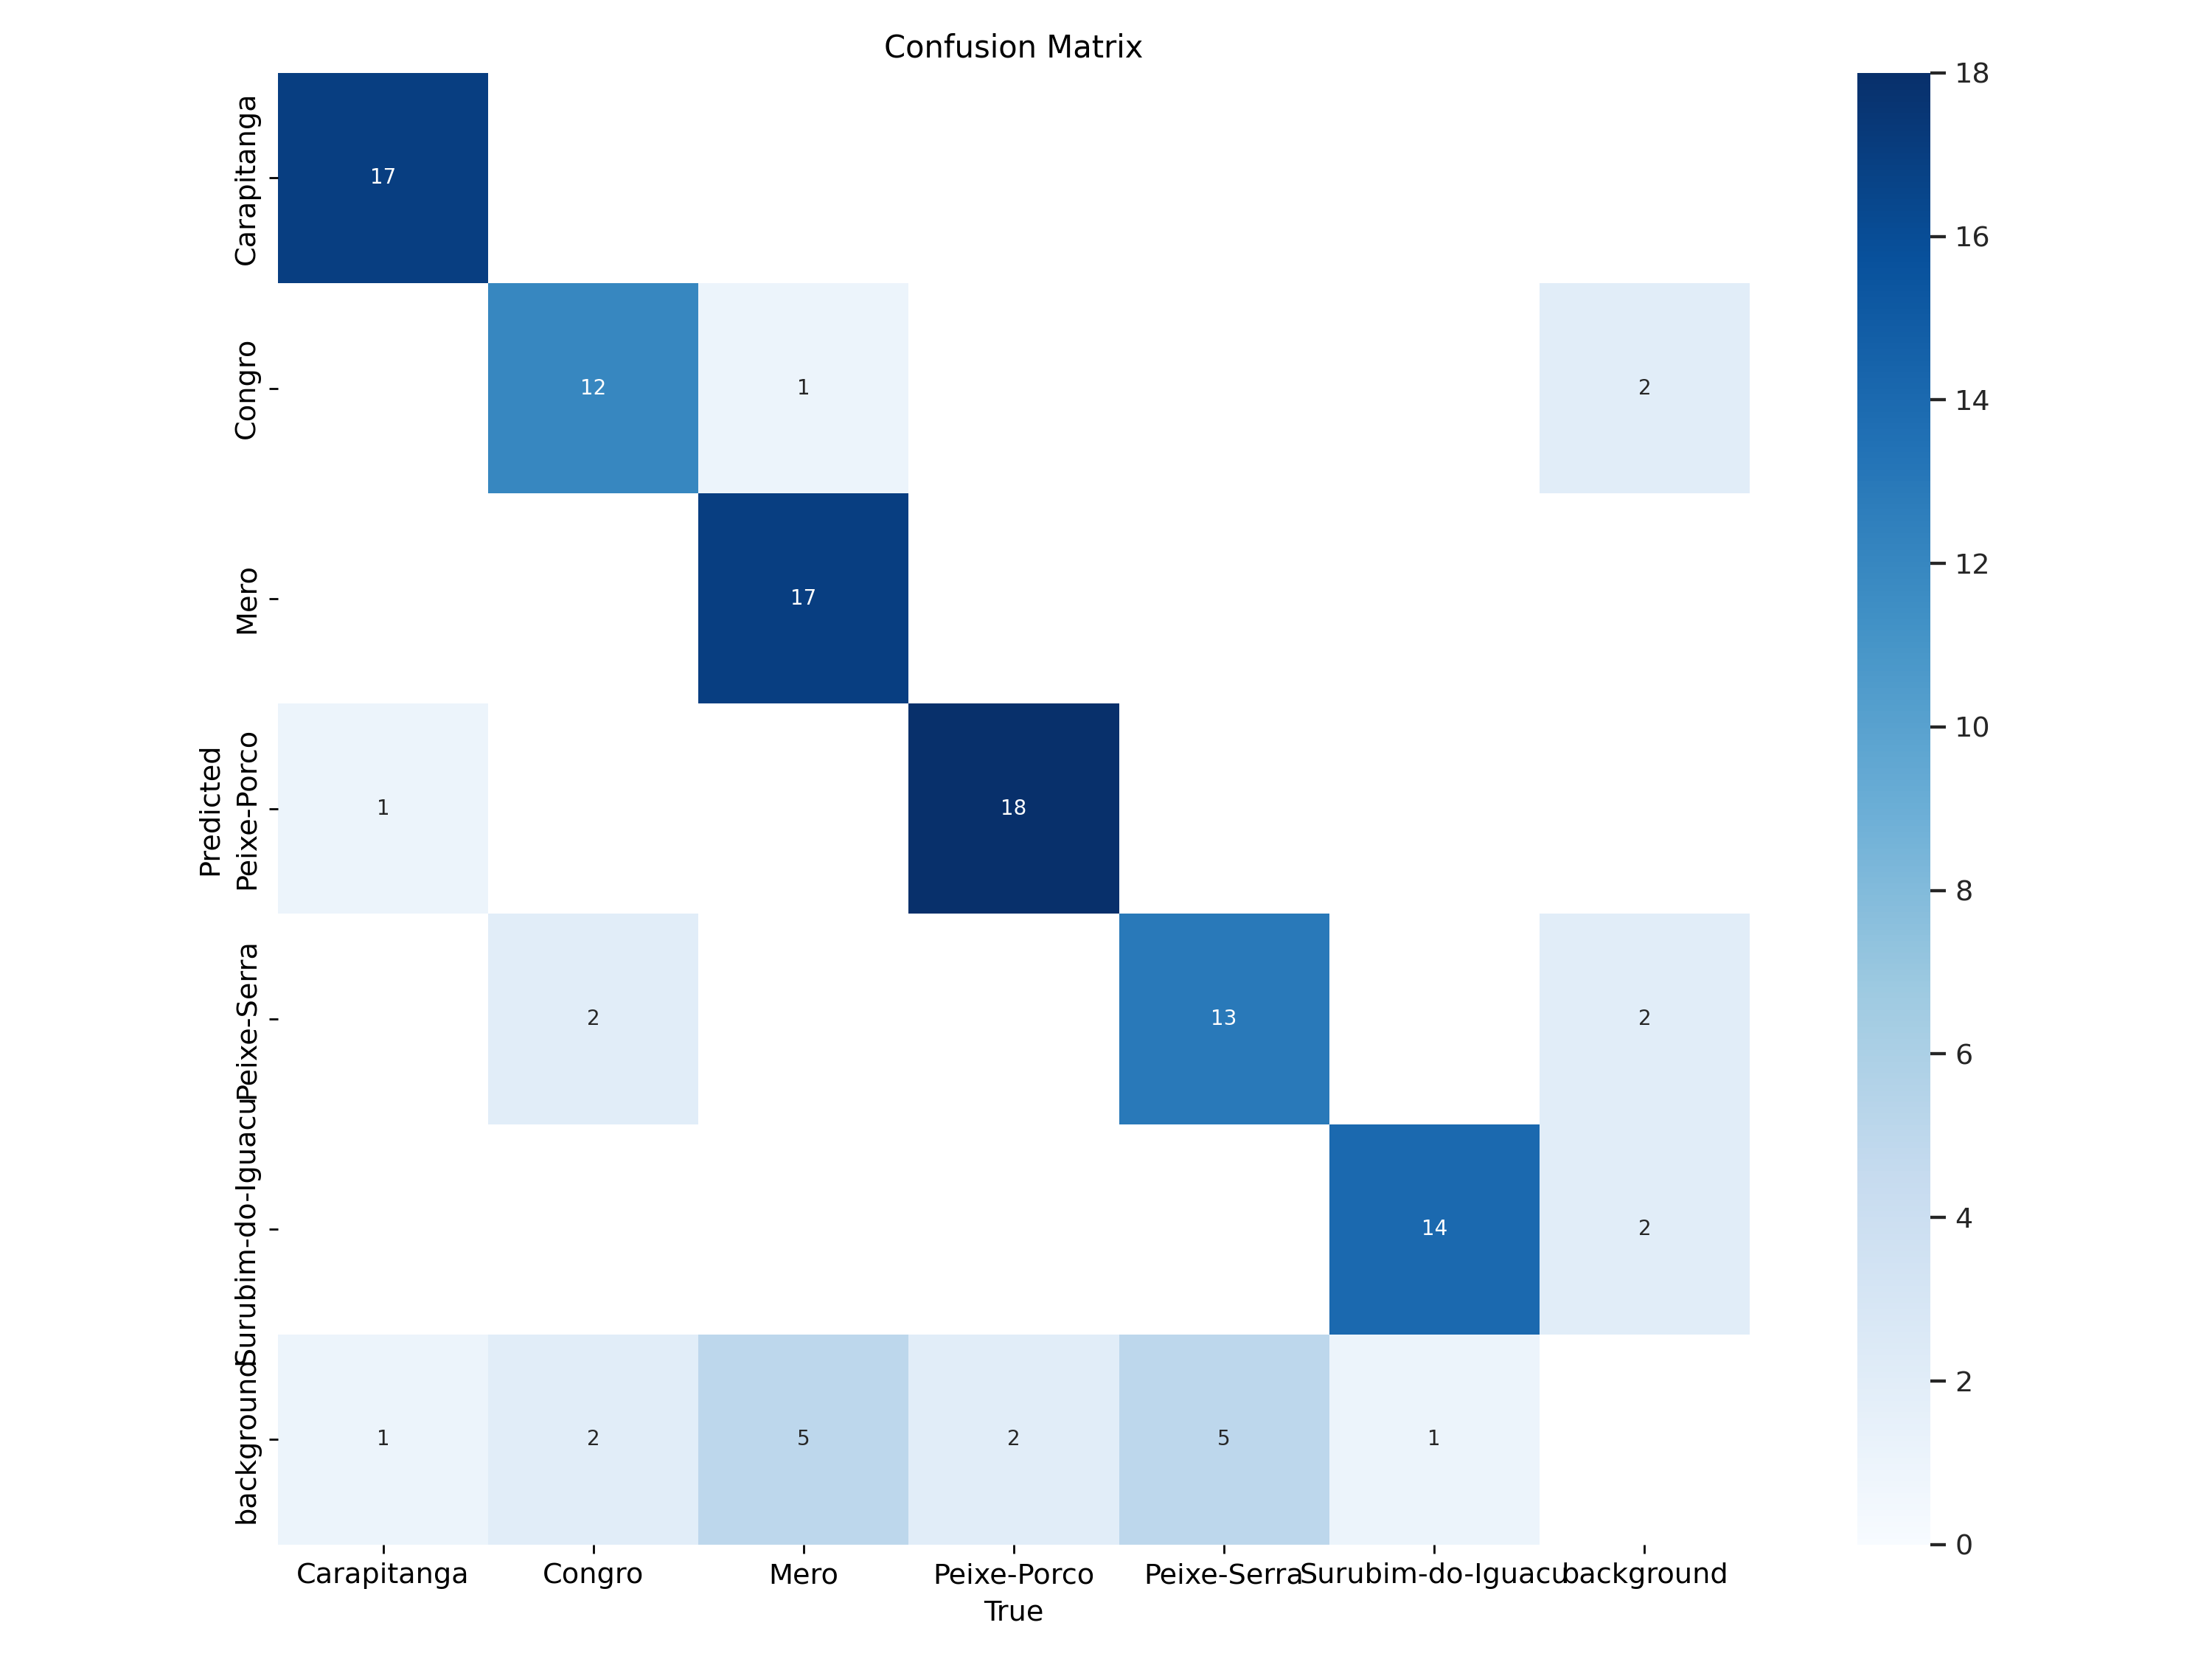

In [ ]:
# Exibe a matriz de confusão gerada pelo treinamento
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


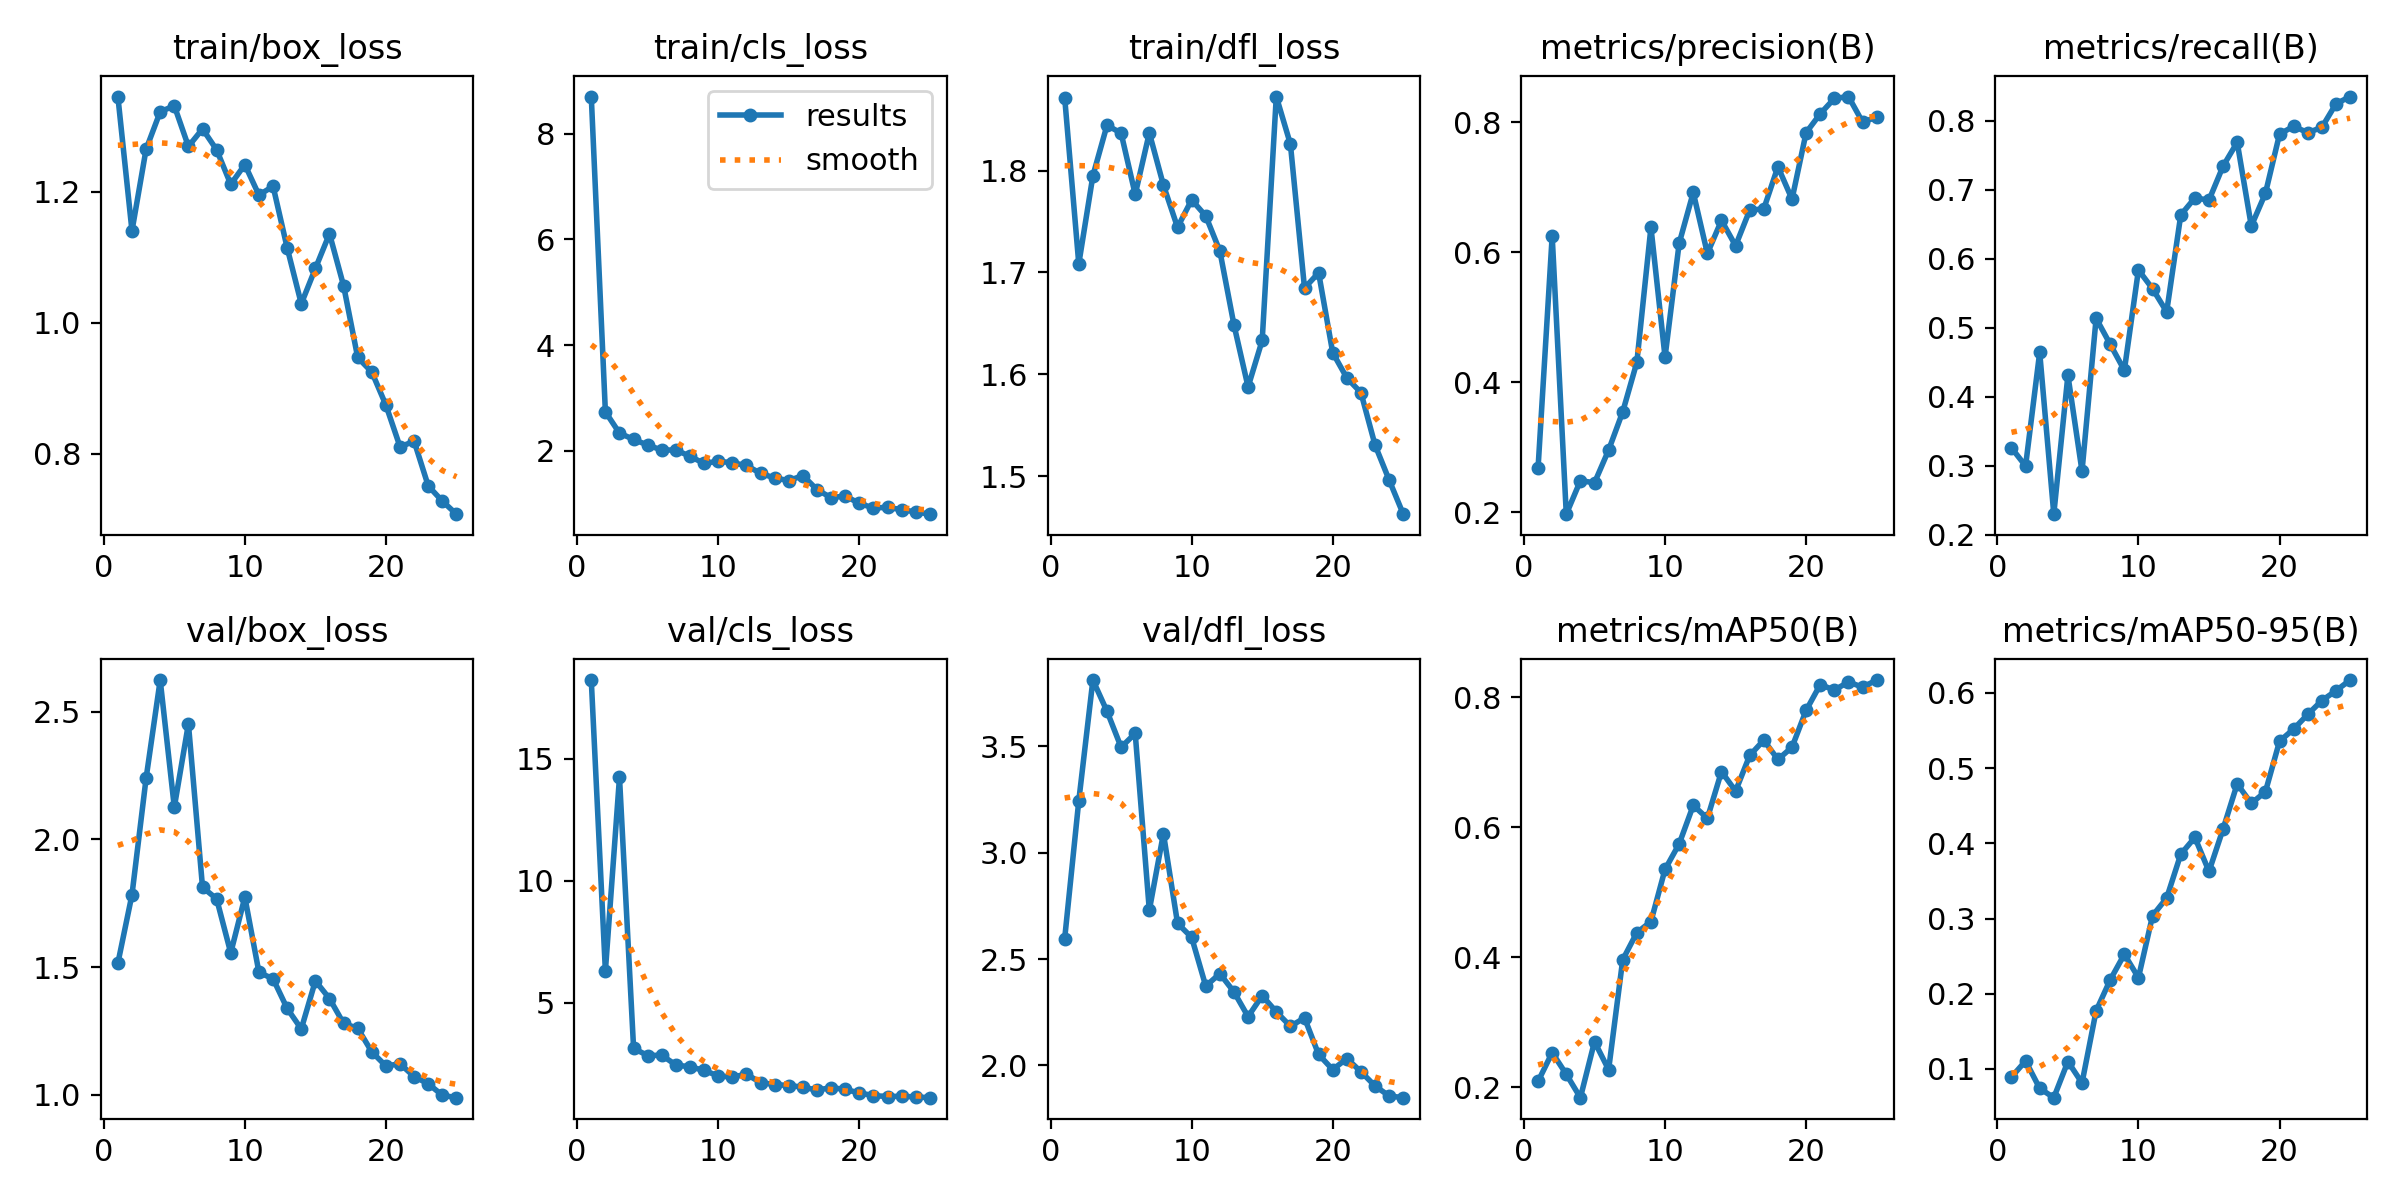

In [ ]:
# Exibe os resultados do treinamento
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


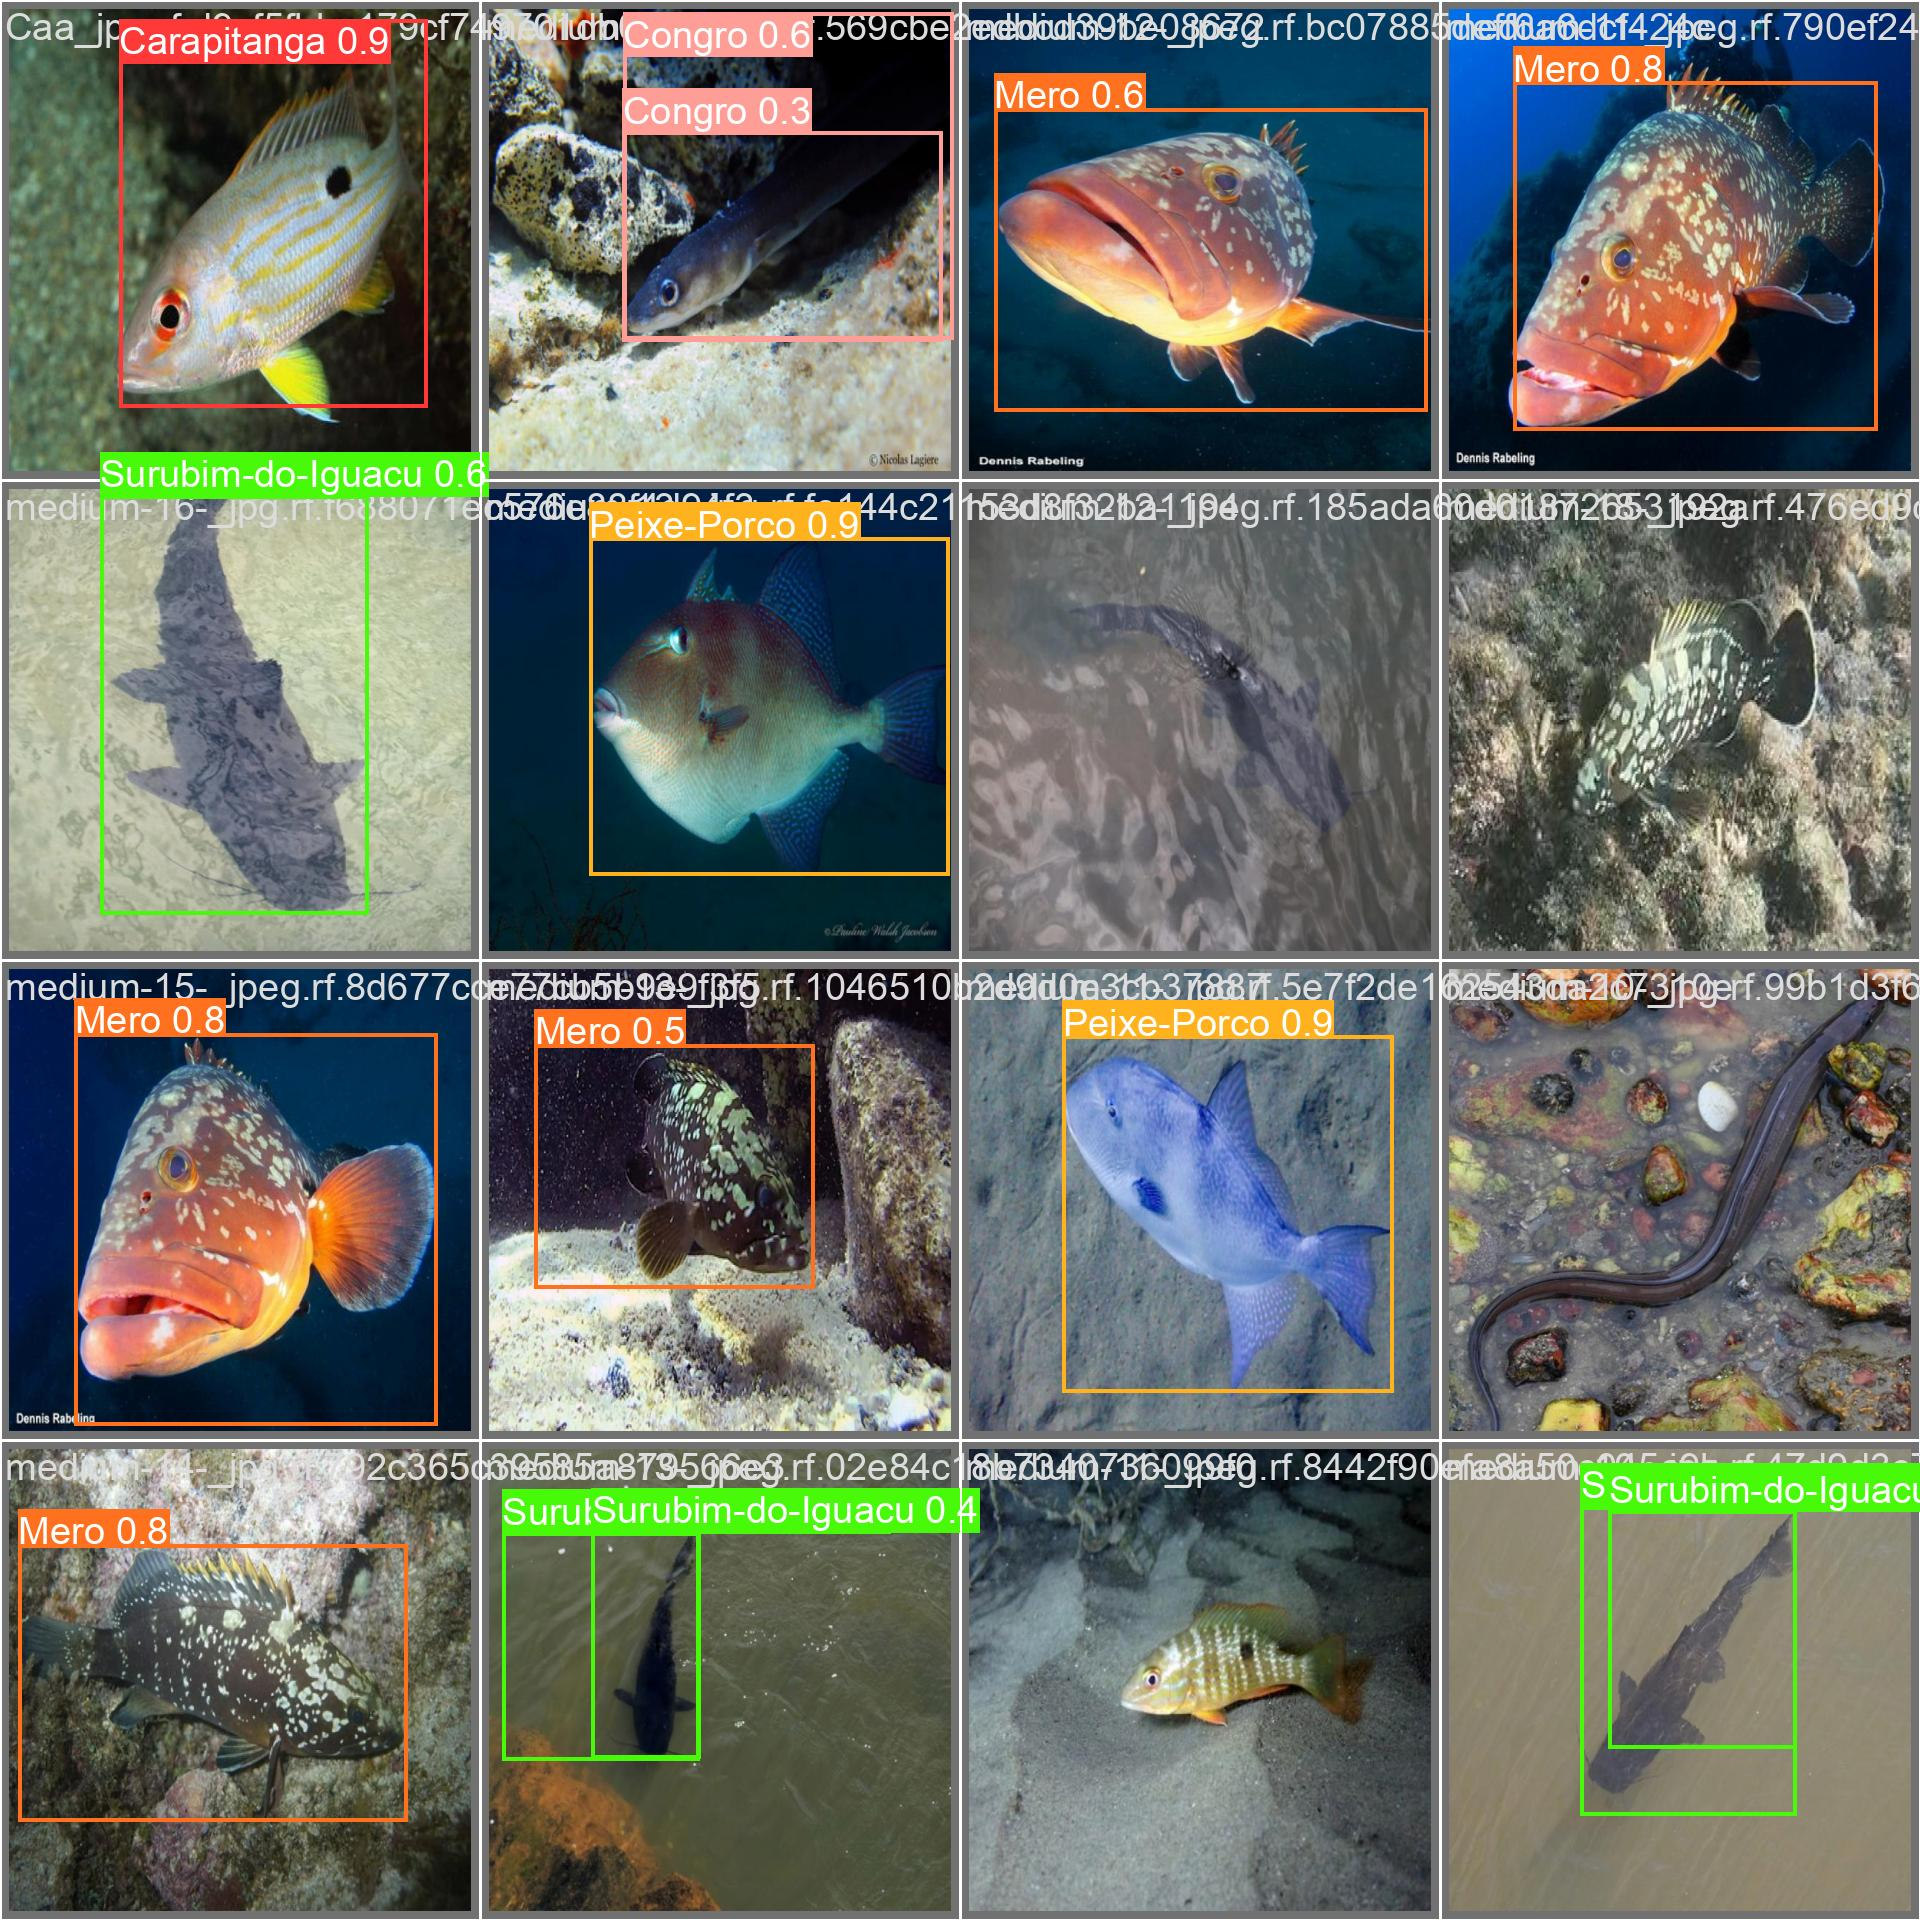

In [ ]:
# Exibe uma imagem de validação com as previsões do modelo
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

/content


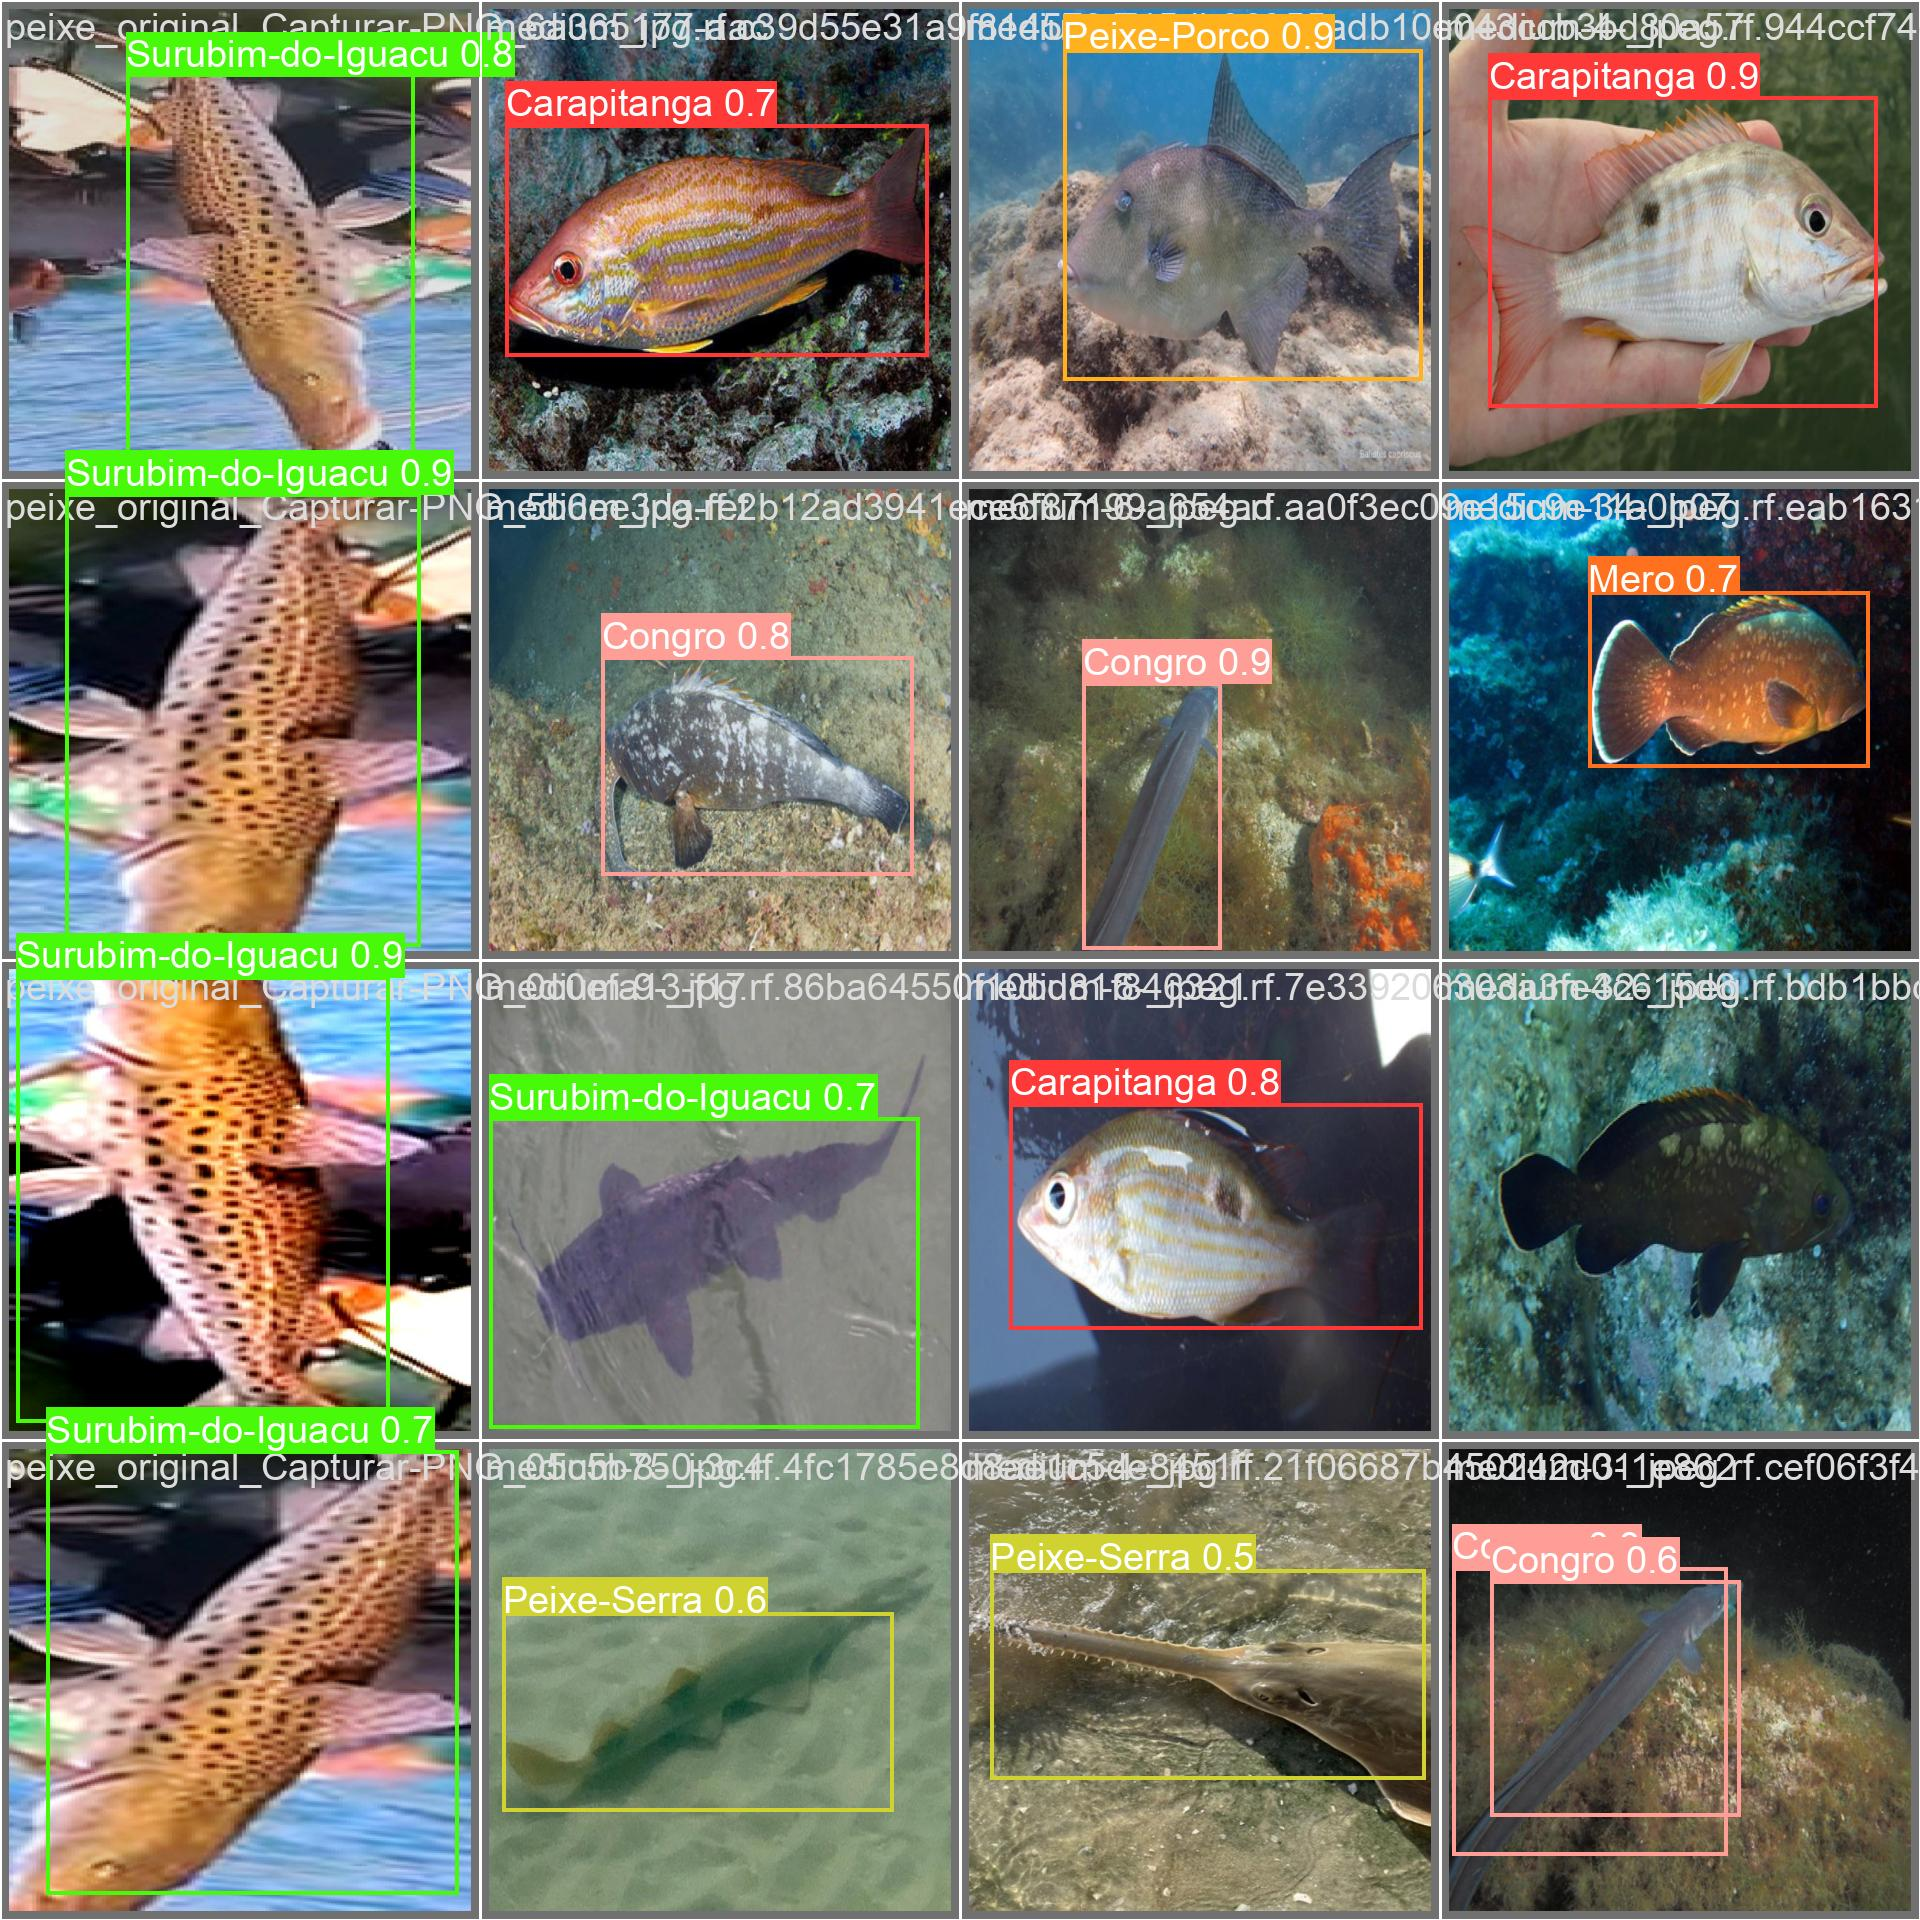

In [ ]:
# Exibe uma imagem de validação com as previsões do modelo
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

/content


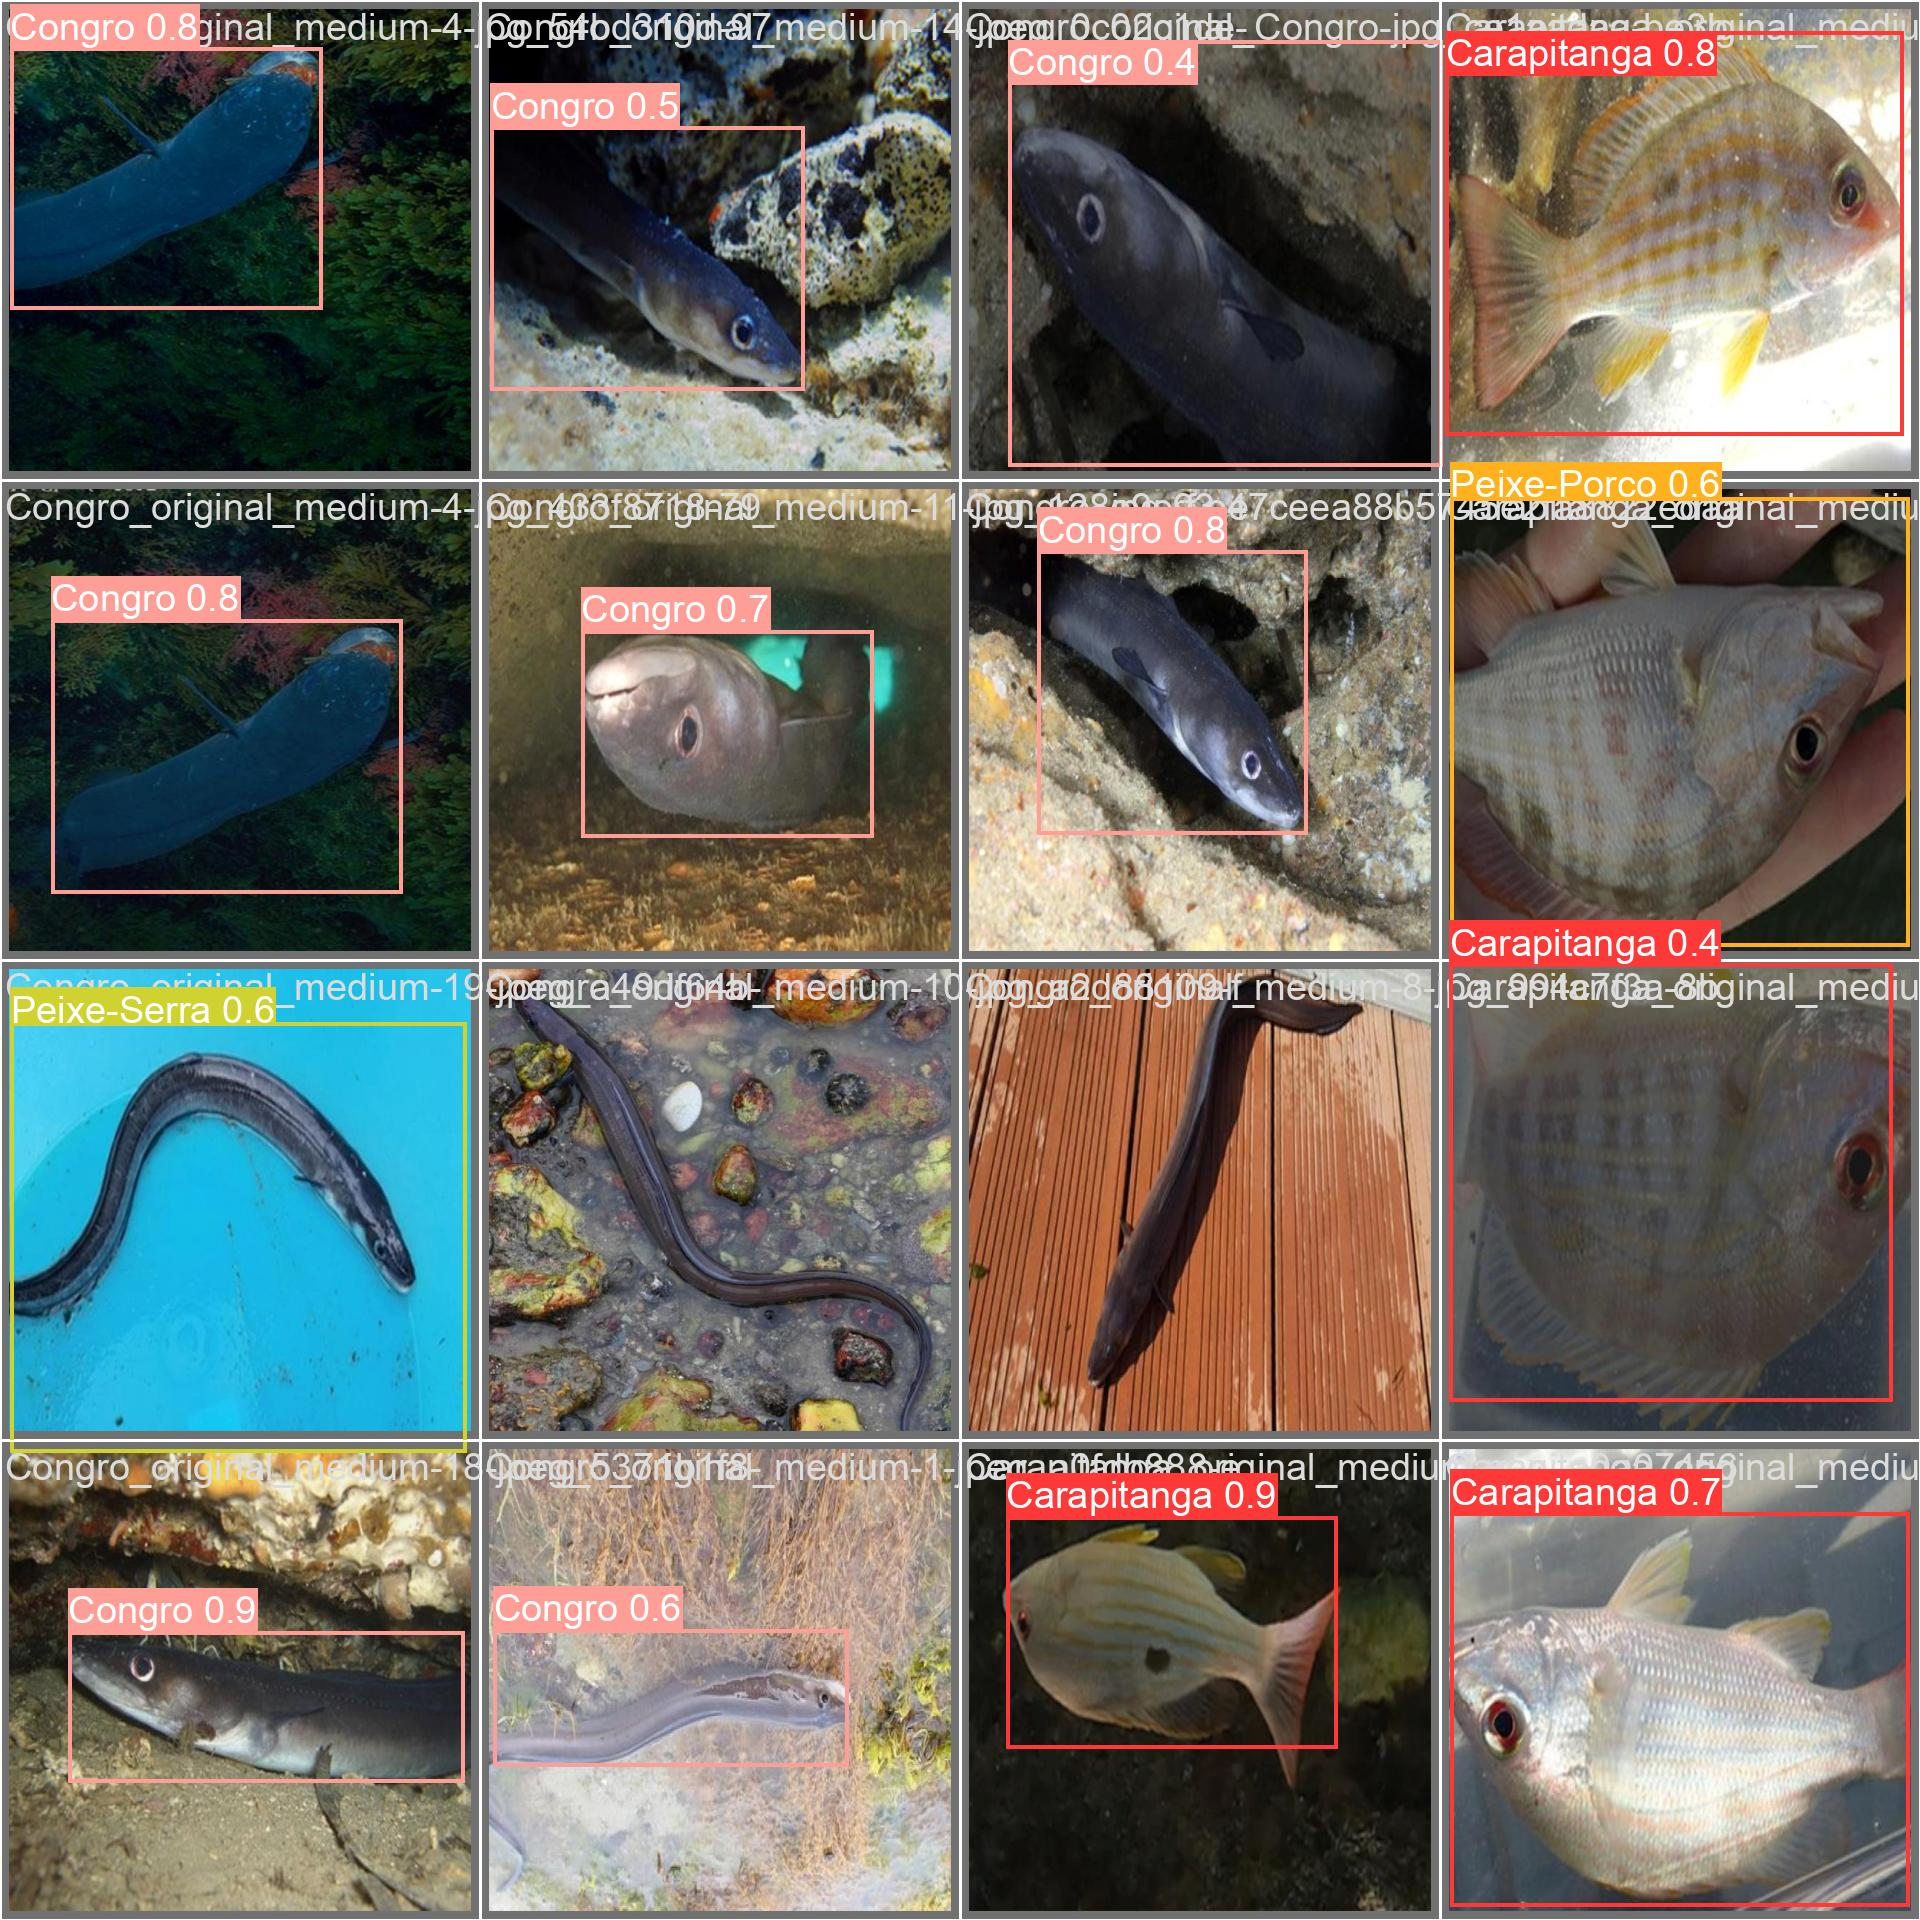

In [ ]:
# Exibe uma imagem de validação com as previsões do modelo
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch2_pred.jpg', width=600)

In [ ]:
# Faz previsões usando o modelo treinado em um vídeo especificado
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.3 source=/content/peixe3.mp4